In [1]:
# Classification & Regression Tree

# Amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.
# Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

In [2]:
# Decision Tree Classification: CART

# DecisionTreeClassifier, sklearn (scikit-learn) kütüphanesinde bulunan bir sınıflandırma algoritmasıdır.
# Karar ağacı olarak da bilinen bu algoritma, veri kümesindeki öznitelikleri kullanarak bir hedef değişkenin değerini
# tahmin etmek için bir ağaç yapısı oluşturur.
# Bu ağaç yapısı, veri kümesindeki özniteliklerin değerlerine göre karar düğümlerinden geçerek sonuca ulaşır.

In [3]:
import warnings
import joblib
#import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, validation_curve
#from skompiler import skompile

pd.set_option("display.max_columns",None)
warnings.simplefilter(action="ignore", category=Warning)

In [4]:
##################
# Model using CART
##################

df = pd.read_csv("diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [5]:
cart_model = DecisionTreeClassifier(random_state=1).fit(X, y)

In [6]:
y_pred = cart_model.predict(X)

y_prob = cart_model.predict_proba(X)[:, 1]

# Confusion Matrix
print(classification_report(y,y_pred))

# AUC
roc_auc_score(y,y_prob)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



1.0

In [7]:
##########################################
# Holdout Yöntemi ile Başarı Değerlendirme
##########################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=17)

cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

In [8]:
# Train Hatası
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:, 1]
print(classification_report(y_train,y_pred))
roc_auc_score(y_train,y_prob)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



1.0

In [9]:
# Test Hatası
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test,y_pred))
roc_auc_score(y_test,y_prob)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       150
           1       0.58      0.57      0.58        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



0.6739506172839506

In [10]:
###################################################
# Cross Validation Yöntemi ile Başarı Değerlendirme
###################################################

cart_model = DecisionTreeClassifier(random_state=17).fit(X,y)

cv_result = cross_validate(cart_model, X, y, cv=10, scoring=["accuracy","f1","roc_auc"])
cv_result

{'fit_time': array([0.        , 0.00352836, 0.        , 0.        , 0.00296164,
        0.00194716, 0.00199056, 0.00238419, 0.00298715, 0.00198603]),
 'score_time': array([0.01036859, 0.        , 0.        , 0.        , 0.00198627,
        0.00304937, 0.00291038, 0.00206852, 0.00200033, 0.00299692]),
 'test_accuracy': array([0.67532468, 0.71428571, 0.66233766, 0.5974026 , 0.71428571,
        0.7012987 , 0.81818182, 0.83116883, 0.69736842, 0.73684211]),
 'test_f1': array([0.54545455, 0.54166667, 0.55172414, 0.39215686, 0.54166667,
        0.59649123, 0.73076923, 0.75471698, 0.5106383 , 0.61538462]),
 'test_roc_auc': array([0.64777778, 0.66074074, 0.6462963 , 0.54518519, 0.66074074,
        0.68481481, 0.79185185, 0.81037037, 0.64076923, 0.70769231])}

In [11]:
cv_result["test_accuracy"].mean()
# 0.7148496240601504

cv_result["test_f1"].mean()
# 0.5780669232692448

cv_result["test_roc_auc"].mean()
# 0.6796239316239316

# Bütün veriyi modellemek için kullanıp bütün veride test ettiğimizde 1 değerini aldık.
# Hold yönetiminde ayırdık train 1 çıktı, test çok düşüt yine kafamız karıştı.
# Çarpmaz doğrulama ile baktık en doğru olduğuna karar verdik.

0.6796239316239316

In [12]:
##############################
# Hiperparametre Optimizasyonu
##############################

cart_model.get_params()

cart_params = {"max_depth": range(1,11),
               "min_samples_split": range(2,20)}

cart_best_grid = GridSearchCV(cart_model, cart_params, cv=5, n_jobs=-1, verbose=True).fit(X,y)

# GridSearchCV, sklearn (scikit-learn) kütüphanesinde bulunan bir hiperparametre ayarlama tekniğidir.
# Bu teknik, modelin performansını artırmak için kullanılan hiperparametrelerin en iyi kombinasyonunu bulmayı amaçlar. 
# Hiperparametreler, modelin yapılandırılmasını ve eğitim sürecini kontrol eden parametrelerdir ve
# genellikle modelin doğruluğunu ve genelleme yeteneğini etkiler.

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [13]:
cart_best_grid.best_params_
# {'max_depth': 5, 'min_samples_split': 4}

cart_best_grid.best_score_

0.7500806383159324

In [14]:
# Tahmin de yaptık
random = X.sample(1,random_state=45)
cart_best_grid.predict(random)

array([1], dtype=int64)

In [15]:
#############
# Final Model
#############
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X,y)

# Alternatif
cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X,y)

In [16]:
cv_result = cross_validate(cart_final, X, y, cv=5, scoring=["accuracy","f1","roc_auc"])
cv_result

{'fit_time': array([0.        , 0.        , 0.01606202, 0.        , 0.        ]),
 'score_time': array([0.       , 0.       , 0.0007329, 0.       , 0.       ]),
 'test_accuracy': array([0.74675325, 0.68831169, 0.75324675, 0.79084967, 0.77124183]),
 'test_f1': array([0.59793814, 0.55555556, 0.59574468, 0.69230769, 0.63157895]),
 'test_roc_auc': array([0.81537037, 0.72333333, 0.80518519, 0.83962264, 0.8054717 ])}

In [17]:
cv_result["test_accuracy"].mean()
# 0.7500806383159324

cv_result["test_f1"].mean()
# 0.614625004082526

cv_result["test_roc_auc"].mean()
# 0.797796645702306

# Değerler arttı. Hiperparametre işe yaradı

0.797796645702306

In [18]:
####################################
# Özellik Önemi (Feature Importance)
####################################

# Her bir özelliğin modelin tahminlerinde ne kadar önemli olduğunu gösterir. 
cart_final.feature_importances_

array([0.01129738, 0.49448119, 0.05065617, 0.        , 0.01497644,
       0.22221379, 0.06819923, 0.13817579])

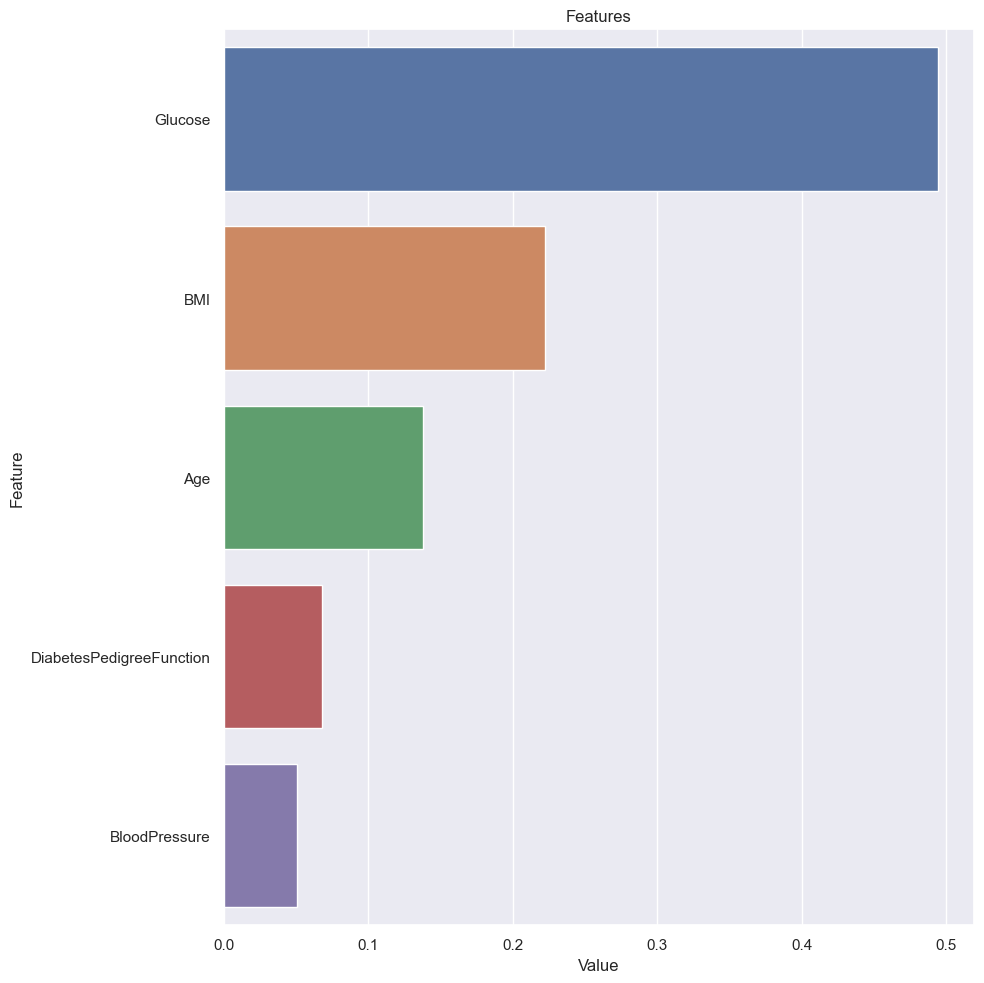

In [19]:
def plot_importance(model,features, num=len(X), save=False):
    feature_imp = pd.DataFrame({"Value":model.feature_importances_, "Feature":features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value",ascending=False)[0:num])
    
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importance.png")
        
# Bir modelin hangi özellikleri daha belirleyici bulduğunu anlamak ve modelin anlamlı özellikleri üzerine
# odaklanmak için kullanılabilir.        

plot_importance(cart_final, X, num=5)

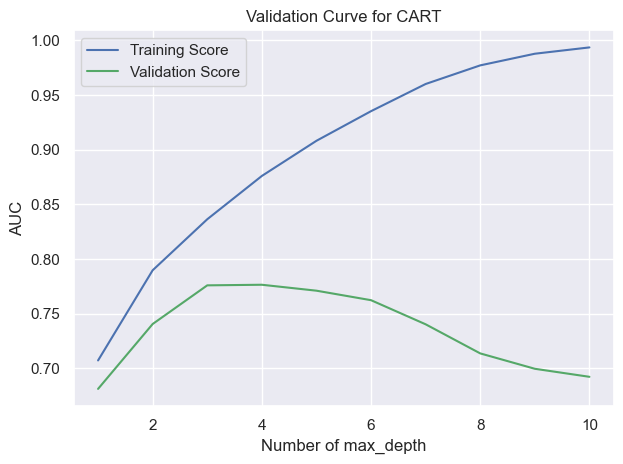

In [20]:
######################################################
# Öğrenme Eğrileriyle Model Karmaşıklığını Analiz Etme
######################################################

train_score, test_score = validation_curve(cart_final,X,y,
                                           param_name="max_depth",
                                           param_range=range(1,11),
                                           scoring="roc_auc",
                                           cv=10)

mean_train_score = np.mean(train_score,axis=1)
mean_test_score = np.mean(test_score,axis=1)

plt.plot(range(1,11), mean_train_score,label="Training Score",color="b")
plt.plot(range(1,11), mean_test_score,label="Validation Score",color="g")

plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

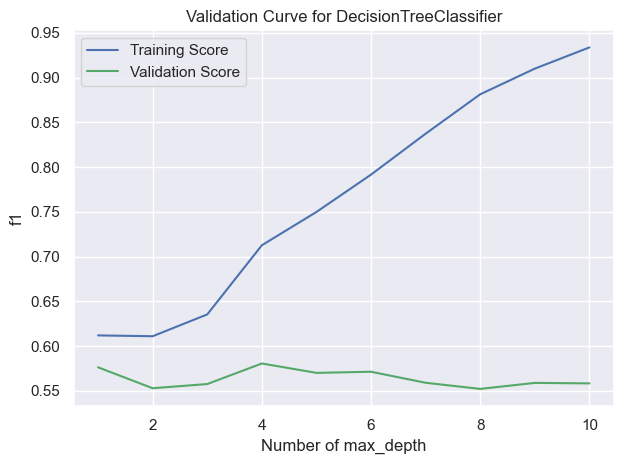

In [21]:
# Fonksiyon
def val_curve_params(model,X,y,param_name,param_range,scoring="roc_auc",cv=10):
    train_score, test_score = validation_curve(
        model, X=X,y=y,param_name=param_name,param_range=param_range,scoring=scoring,cv=cv)
    
    mean_train_score = np.mean(train_score,axis=1)
    mean_test_score = np.mean(test_score,axis=1)
    
    plt.plot(param_range, mean_train_score,label="Training Score",color="b")
    plt.plot(param_range, mean_test_score,label="Validation Score",color="g")
    
    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()

# validation_curve fonksiyonunu kullanarak belirtilen hiperparametre aralığında modelin eğitim ve doğrulama skorlarını hesaplar.
# Sonuçları grafik olarak çizer ve ekrana basar.   

val_curve_params(cart_final,X,y,"max_depth",range(1,11),scoring="f1")

In [22]:
################################
# Görselleştirme (Visualization)
################################
def tree_graph(model, col_names, file_name):
    tree_str = export_graphviz(model,feature_names=col_names,filled=True,out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)
    
tree_graph(model=cart_final,col_names=X.columns,file_name="cart_final.png")    

NameError: name 'pydotplus' is not defined

In [ ]:
#############################################
# Karar Kuralları (Extracting Decision Rules)
#############################################
tree_rules = export_text(cart_final,feature_names=list(X.columns))
print(tree_rules)

In [ ]:
##############################################
# Karar Kurallarının Python Kodlarını Çıkartma
##############################################
print(skompile(cart_final.predict).to("python/code"))

print(skompile(cart_final.predict).to("sqlalchemy/sqlite")) # SQL kodu

print(skompile(cart_final.predict).to("excel"))

In [23]:
#################################################
# Python Kodları ile Tahmin(Predcition) İşlemleri
#################################################

# def predict_wiht_rules(x): fonksiyonun devamı üstte aldığımız kodlar
# X.columns
# x = [12,13,20,23,4,55,12,7]
# predict_with_rules(x)

In [30]:
###########################
# Model Kaydetme ve Çağırma 
###########################

joblib.dump(cart_final,"cart_final.pkl") # Modeli dışarı kaydettik.

cart_model_from_disc = joblib.load("cart_final.pkl") # Modeli çağırdık ve yeni değişkene atadık.

x = [12,13,20,23,4,55,12,7] # Değişkenlere değerler verdik

cart_model_from_disc.predict(pd.DataFrame(x).T) # Modelimize sorduk, bu değerler diyabet midir değil midir?

array([1], dtype=int64)